<a href="https://colab.research.google.com/github/KinuthiaJ/Hotel-Reservations/blob/main/HOTEL_RESERVATIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEFINING THE QUESTION:**

What factors affect whether a customer honors or cancel a hotel reservation

**Defining the Metric for Success**

We want to create a model that can predict if a customer will honor or cancel a reservation with 70% accuracy

**Understanding the context**

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

**Recording the Experimental Design**

1. Importing and cleaning the data
2. Exploratory data anlysis
3. Creating the model
4. Testing the model
5. Recommending a solution
6. Implementing the solution
7. Challenging the solution. 

**Data Relevance**



**READING THE DATA**

In [76]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [77]:
# Reading the data
Reservations = pd.read_csv("Hotel Reservations.csv")

**CHECKING THE DATA**

In [78]:
# No of records in the dataset
Reservations.shape

(36275, 19)

The dataset has 36,275 rows and 19 columns

In [79]:
# Previewing the top of the dataset
Reservations.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [80]:
# Previewing the bottom of the dataset
Reservations.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


**DATA VALIDATION**

**CLEANING THE DATASET**

In [81]:
# Checking for duplicates
Reservations["Booking_ID"].duplicated().sum()

0

There are nill duplicated entries in the data set. Since we have confirmed that all entries under the booking ID are unique, we can drop the column since it will not have an impact on the analysis.

In [82]:
# Dropping booking ID column
Reservations = Reservations.drop("Booking_ID",axis=1)

In [83]:
# Checking for missing data
Reservations.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no missing values in the dataset

In [84]:
# Checking the data types for the variables
Reservations.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

All the variables have correct data types save for "required_car_parking_space" and "repeated_guest", which are Categorical variables, that have already been encoded i.e. 0 represents "No", 1 represents "yes"



In [85]:
# Changing the data types for the above mentioned variables
Reservations["required_car_parking_space"].astype('category')
Reservations["repeated_guest"].astype('category')


0        0
1        0
2        0
3        0
4        0
        ..
36270    0
36271    0
36272    0
36273    0
36274    0
Name: repeated_guest, Length: 36275, dtype: category
Categories (2, int64): [0, 1]

In [86]:
# Checking for outliers for the categorical variables
Meal_plan = Reservations["type_of_meal_plan"].value_counts()
print(Meal_plan)
print("*********************")
Room_type = Reservations["room_type_reserved"].value_counts()
print(Room_type)
print("*********************")
Arrival_year = Reservations["arrival_year"].value_counts()
print(Arrival_year)
print("*********************")
Segment = Reservations["market_segment_type"].value_counts()
print(Segment)
print("*********************")
Booking_status = Reservations["booking_status"].value_counts()
print(Booking_status)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
*********************
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
*********************
2018    29761
2017     6514
Name: arrival_year, dtype: int64
*********************
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
*********************
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


Out of the categorical variables, only "type_of_meal_plan" and "room_type_reserved" seem to have outliers having 5 entries for Meal plan 3 and 7 entries for room type 3 respectively. However, we shall maintain these entries as they are since they may have an impact on the question we are tying to answer. 

Under "type_of_meal_plan" variable, we have entries that were not selected. These could have been in error since on most websites, when making a reservation, you have to select a meal plan as this determines the price charged. 

In [87]:
# Replacing entries "Not Selected" under type of meal plan variable with the mode
mode = Reservations['type_of_meal_plan'].mode()[0]
Reservations['type_of_meal_plan'].replace("Not Selected", mode, inplace=True)

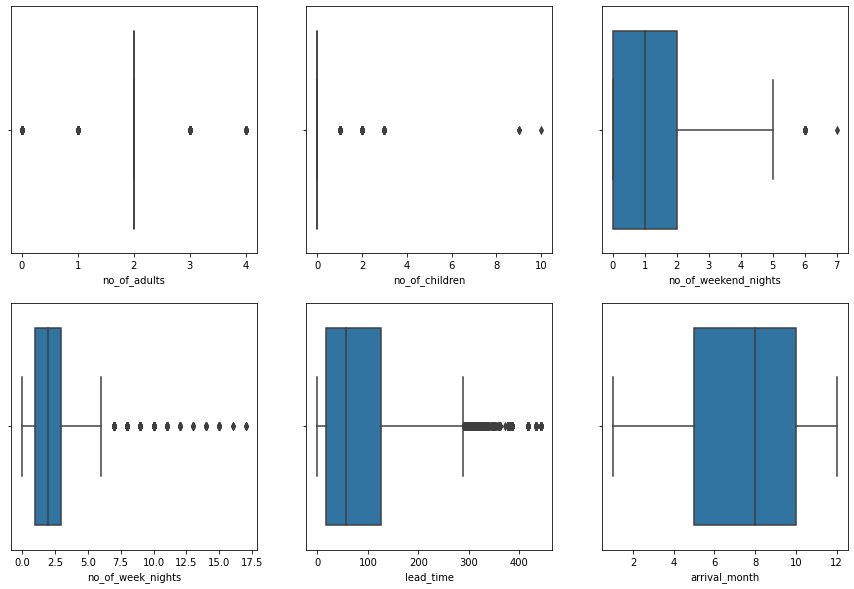

In [88]:
# Checking for outliers for the numerical variables.
numeric_cols = ["no_of_adults","no_of_children", "no_of_weekend_nights", "no_of_week_nights", "lead_time","arrival_month"]
fig,axes = plt.subplots(nrows=2, ncols=3,figsize = (15,10))
for ax, data, column in zip (axes.flatten(),Reservations,numeric_cols):
  sns.boxplot(Reservations[column],ax=ax)

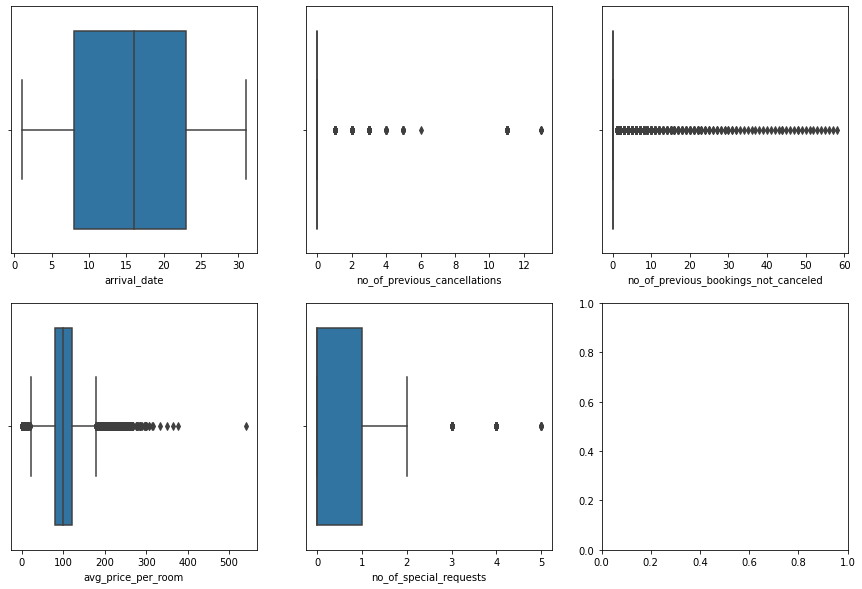

In [89]:
numeric_cols2 = ["arrival_date", "no_of_previous_cancellations","no_of_previous_bookings_not_canceled",'avg_price_per_room', "no_of_special_requests"]
fig,axes = plt.subplots(nrows=2, ncols=3,figsize = (15,10))
for ax, data, column in zip (axes.flatten(),Reservations,numeric_cols2):
  sns.boxplot(Reservations[column],ax=ax)

In order not to lose too much information, we shall replace the outliers with the mean. 


In [90]:
outlierfilter3 = Reservations["no_of_weekend_nights"]>2
Reservations.loc[outlierfilter3,"no_of_weekend_nights"] = 2
outlierfilter4 = Reservations["no_of_week_nights"]>5
Reservations.loc[outlierfilter4,"no_of_week_nights"] = 2
outlierfilter5 = Reservations["lead_time"]>126
Reservations.loc[outlierfilter5,"lead_time"] = 85
outlierfilter6 = Reservations["no_of_previous_cancellations"]>6
Reservations.loc[outlierfilter6,"no_of_previous_cancellations"] = 4
outlierfilter7 = Reservations["avg_price_per_room"]>120
Reservations.loc[outlierfilter7,"avg_price_per_room"] = 103
outlierfilter9 = Reservations["avg_price_per_room"]<80
Reservations.loc[outlierfilter9,"avg_price_per_room"] = 103

Points to note for the outliers:
 - Number of adults maintained as is since we could have some reservations that are made solely for children, hence 0 adults. In addition, we may have adults who have made group reservations. 
 - Number of children will also be maintained as is since we could have reservations made for groups of children such as school trips or  large family retreats. 
 - Number of special requests will be maintained as is since we could have many special requests mostly in cases for large group reservations. 

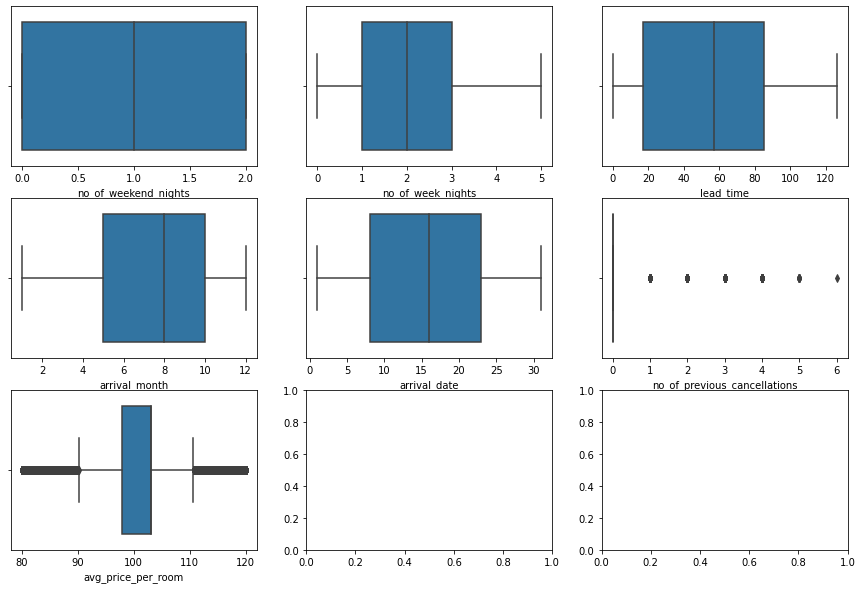

In [91]:
#Rechecking the outliers
numeric_cols = ["no_of_weekend_nights", "no_of_week_nights", "lead_time","arrival_month","arrival_date", "no_of_previous_cancellations",'avg_price_per_room']
fig,axes = plt.subplots(nrows=3, ncols=3,figsize = (15,10))
for ax, data, column in zip (axes.flatten(),Reservations,numeric_cols):
  sns.boxplot(Reservations[column],ax=ax)

**UNIVARIATE ANALYSIS**

In [92]:
# Descriptive statistics for the data
Reservations.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.794238,2.121268,0.030986,53.699242,2017.820427,7.423653,15.596995,0.025637,0.017533,0.153411,101.095035,0.619655
std,0.518715,0.402648,0.825922,1.206792,0.173281,36.390026,0.383836,3.069894,8.740447,0.158053,0.216029,1.754171,8.619319,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,80.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,97.875000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,103.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,85.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,103.000000,1.000000
max,4.000000,10.000000,2.000000,5.000000,1.000000,126.000000,2018.000000,12.000000,31.000000,1.000000,6.000000,58.000000,120.000000,5.000000


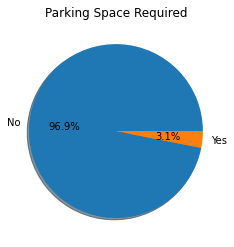

*****************


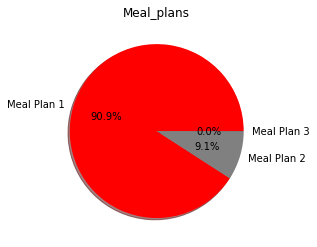

*********************


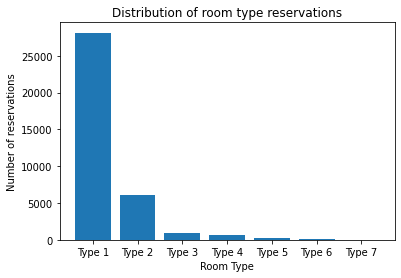

*********************


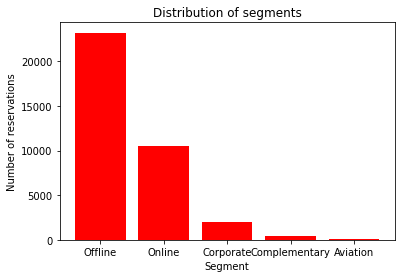

*********************


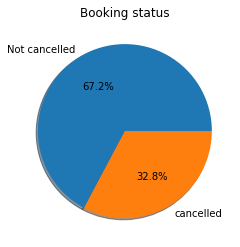

*****************
Most of the reservations were made in the year 0    2018
dtype: int64
*****************
Most of the reservations were for the 0    10
dtype: int64 Month
*****************
Most of the reservations were for the 0    13
dtype: int64 date of the month


In [93]:
# Mode for the categorical variables
Mode1 = Reservations["required_car_parking_space"].value_counts()
labels = ["No","Yes"]
plt.pie(Mode1,autopct='%1.1f%%',labels=labels, shadow=True)
plt.title("Parking Space Required")
plt.show()
print("*****************")

Meal_plans = Reservations['type_of_meal_plan'].value_counts()
labels = ["Meal Plan 1","Meal Plan 2","Meal Plan 3"]
colors = ["Red","Grey","black"]
plt.pie(Meal_plans,autopct='%1.1f%%',labels=labels, colors=colors,shadow=True)
plt.title("Meal_plans")
plt.show()
print("*********************")

x= ["Type 1","Type 2","Type 3","Type 4","Type 5", "Type 6", "Type 7"]
y = Room_type
plt.bar(x,y)
plt.title('Distribution of room type reservations')
plt.xlabel('Room Type')
plt.ylabel('Number of reservations')
plt.show()
print("*********************")

x= ["Offline","Online","Corporate","Complementary","Aviation"]
y = Segment
plt.bar(x,y,color = "Red")
plt.title('Distribution of segments')
plt.xlabel('Segment')
plt.ylabel('Number of reservations')
plt.show()
print("*********************")

labels = ["Not cancelled","cancelled"]
plt.pie(Booking_status,autopct='%1.1f%%',labels=labels, shadow=True)
plt.title("Booking status")
plt.show()
print("*****************")

Mode2 = Reservations["arrival_year"].mode()
print("Most of the reservations were made in the year",Mode2)
print("*****************")

Mode3 = Reservations["arrival_month"].mode()
print("Most of the reservations were for the", Mode3, "Month")
print("*****************")

Mode4 = Reservations["arrival_date"].mode()
print("Most of the reservations were for the", Mode4, "date of the month")

From the above, we can derive that;
- Many of the guests did not require parking spaces. 
- Majority of the bookings/guest stays were in 2018.
- Majority of the bookings/guest stays were in the month of October.
- Majority of the bookings/guest stays were around the 13th of each month. 
- The most popular meal plan is Meal plan 1
- The most common room type reserved is Room Type 1
- Most of the reservations were done online
- Most of the reservations/bookings were actualized i.e. not cancelled. 

In [94]:
import plotly.subplots as sp
import plotly.graph_objs as go
import pandas as pd
import numpy as np

# Histogram data
data = {'Price Per Room': Reservations["avg_price_per_room"],
        'Number of adults': Reservations["no_of_adults"],
        'Number of Children': Reservations["no_of_children"],
        'Number of weekend nights': Reservations["no_of_weekend_nights"],
        'Number of Week nights': Reservations["no_of_week_nights"],
        'Number of previous cancellations': Reservations["no_of_previous_cancellations"],
        'Number of previous bookings not cancelled': Reservations["no_of_previous_bookings_not_canceled"],
        'Number of special requests per reservation': Reservations["no_of_special_requests"]}
df = pd.DataFrame(data)

# Plotting the histograms
fig = sp.make_subplots(rows=4, cols=4)
for i, col in enumerate(df.columns):
  fig.add_trace(go.Histogram(x=df[col], name=col),row=(i // 2) + 1, col=(i % 2) + 1)

# Show the figure
fig.show()


From the above, we can deduce the following:
- The average price per room is $100
- A large number of the reservations have a lead time of between 80 to 100 days.
-Most reservations have only one adult and no children. 
- Many of the reservations that are made for week nights are for 2 nights while those made for weekend nights are for 1 night. 
- Many of the previous reservations were not cancelled.
- Majority of the reservations did not include special requests. However, those that included special requests had a maximum of 1 special request.


**BIVARIATE ANALYSIS**

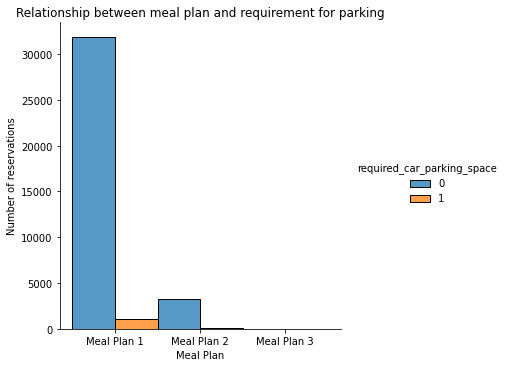

In [95]:
# Understanding the relationship between the categorical variables.

sns.displot(Reservations, x="type_of_meal_plan", hue="required_car_parking_space", multiple="dodge")
plt.xlabel("Meal Plan")
plt.ylabel("Number of reservations")
plt.title("Relationship between meal plan and requirement for parking")
plt.show()


For the reservations for meal plan 1, majority of the reservations did not require parking

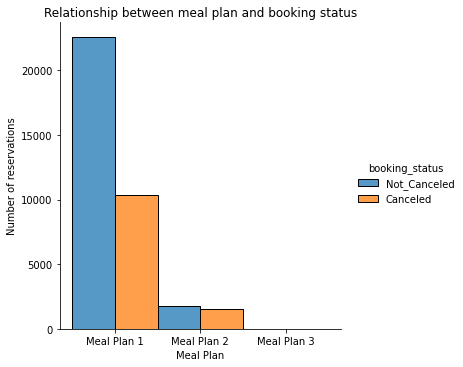

In [96]:
sns.displot(Reservations, x="type_of_meal_plan", hue="booking_status", multiple="dodge")
plt.xlabel("Meal Plan")
plt.ylabel("Number of reservations")
plt.title("Relationship between meal plan and booking status")
plt.show()

Most of the reservations that were cancelled were under meal plan 1

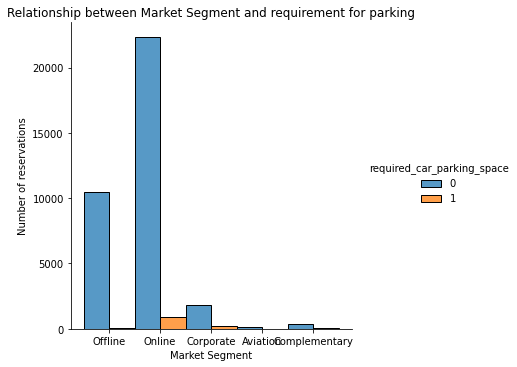

In [97]:
sns.displot(Reservations, x="market_segment_type", hue="required_car_parking_space", multiple="dodge")
plt.xlabel("Market Segment")
plt.ylabel("Number of reservations")
plt.title("Relationship between Market Segment and requirement for parking")
plt.show()


Majortity of the online reservations made did not require parking space.

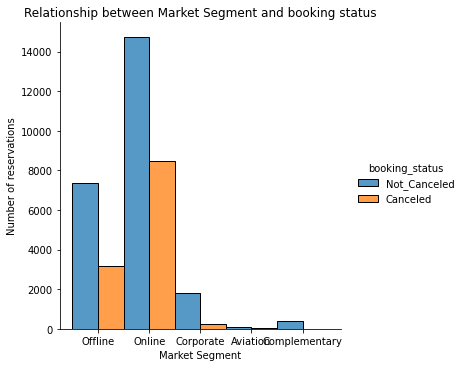

In [98]:
sns.displot(Reservations, x="market_segment_type", hue="booking_status", multiple="dodge")
plt.xlabel("Market Segment")
plt.ylabel("Number of reservations")
plt.title("Relationship between Market Segment and booking status")
plt.show()

Most of the cancelled reservations were booked online

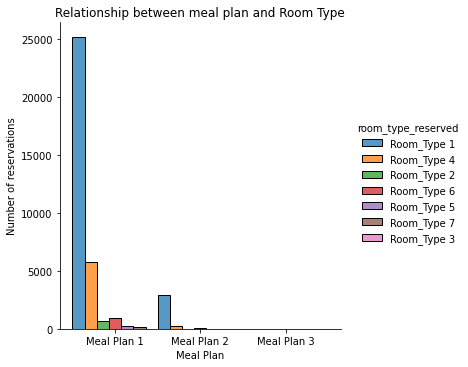

In [99]:
sns.displot(Reservations, x="type_of_meal_plan", hue="room_type_reserved", multiple="dodge")
plt.xlabel("Meal Plan")
plt.ylabel("Number of reservations")
plt.title("Relationship between meal plan and Room Type")
plt.show()

Meal plan 1 is most often reserved together with Room Type 1. Meal plan 1 is also popular among the reservations made for Room Type 4.  

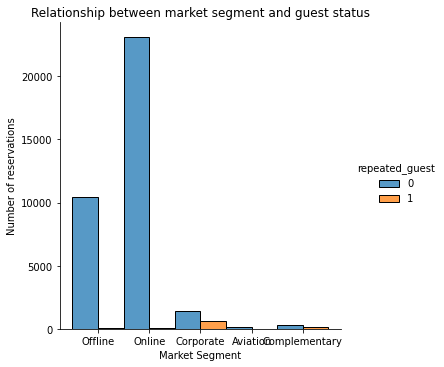

In [100]:
sns.displot(Reservations, x="market_segment_type", hue="repeated_guest", multiple="dodge")
plt.xlabel("Market Segment")
plt.ylabel("Number of reservations")
plt.title("Relationship between market segment and guest status")
plt.show()

Only the corporate and complementary segments had repeat guests making reservations although these were quite few. 

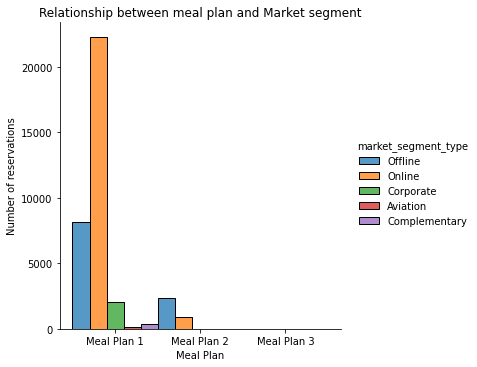

In [101]:
sns.displot(Reservations, x="type_of_meal_plan", hue="market_segment_type", multiple="dodge")
plt.xlabel("Meal Plan")
plt.ylabel("Number of reservations")
plt.title("Relationship between meal plan and Market segment")
plt.show()

For reservations made online, the most popular meal plan is meal plan 1.

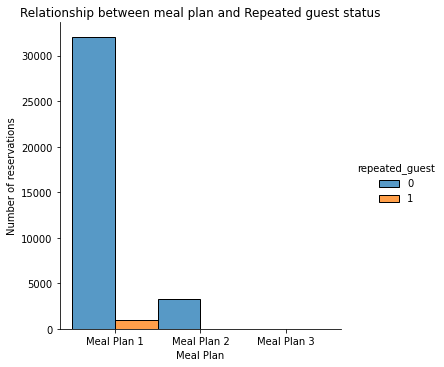

In [102]:
sns.displot(Reservations, x="type_of_meal_plan", hue="repeated_guest", multiple="dodge")
plt.xlabel("Meal Plan")
plt.ylabel("Number of reservations")
plt.title("Relationship between meal plan and Repeated guest status")
plt.show()

Meal plan 1 is most popular among the new guests. Few of the repeat guests opt for meal plan 1.

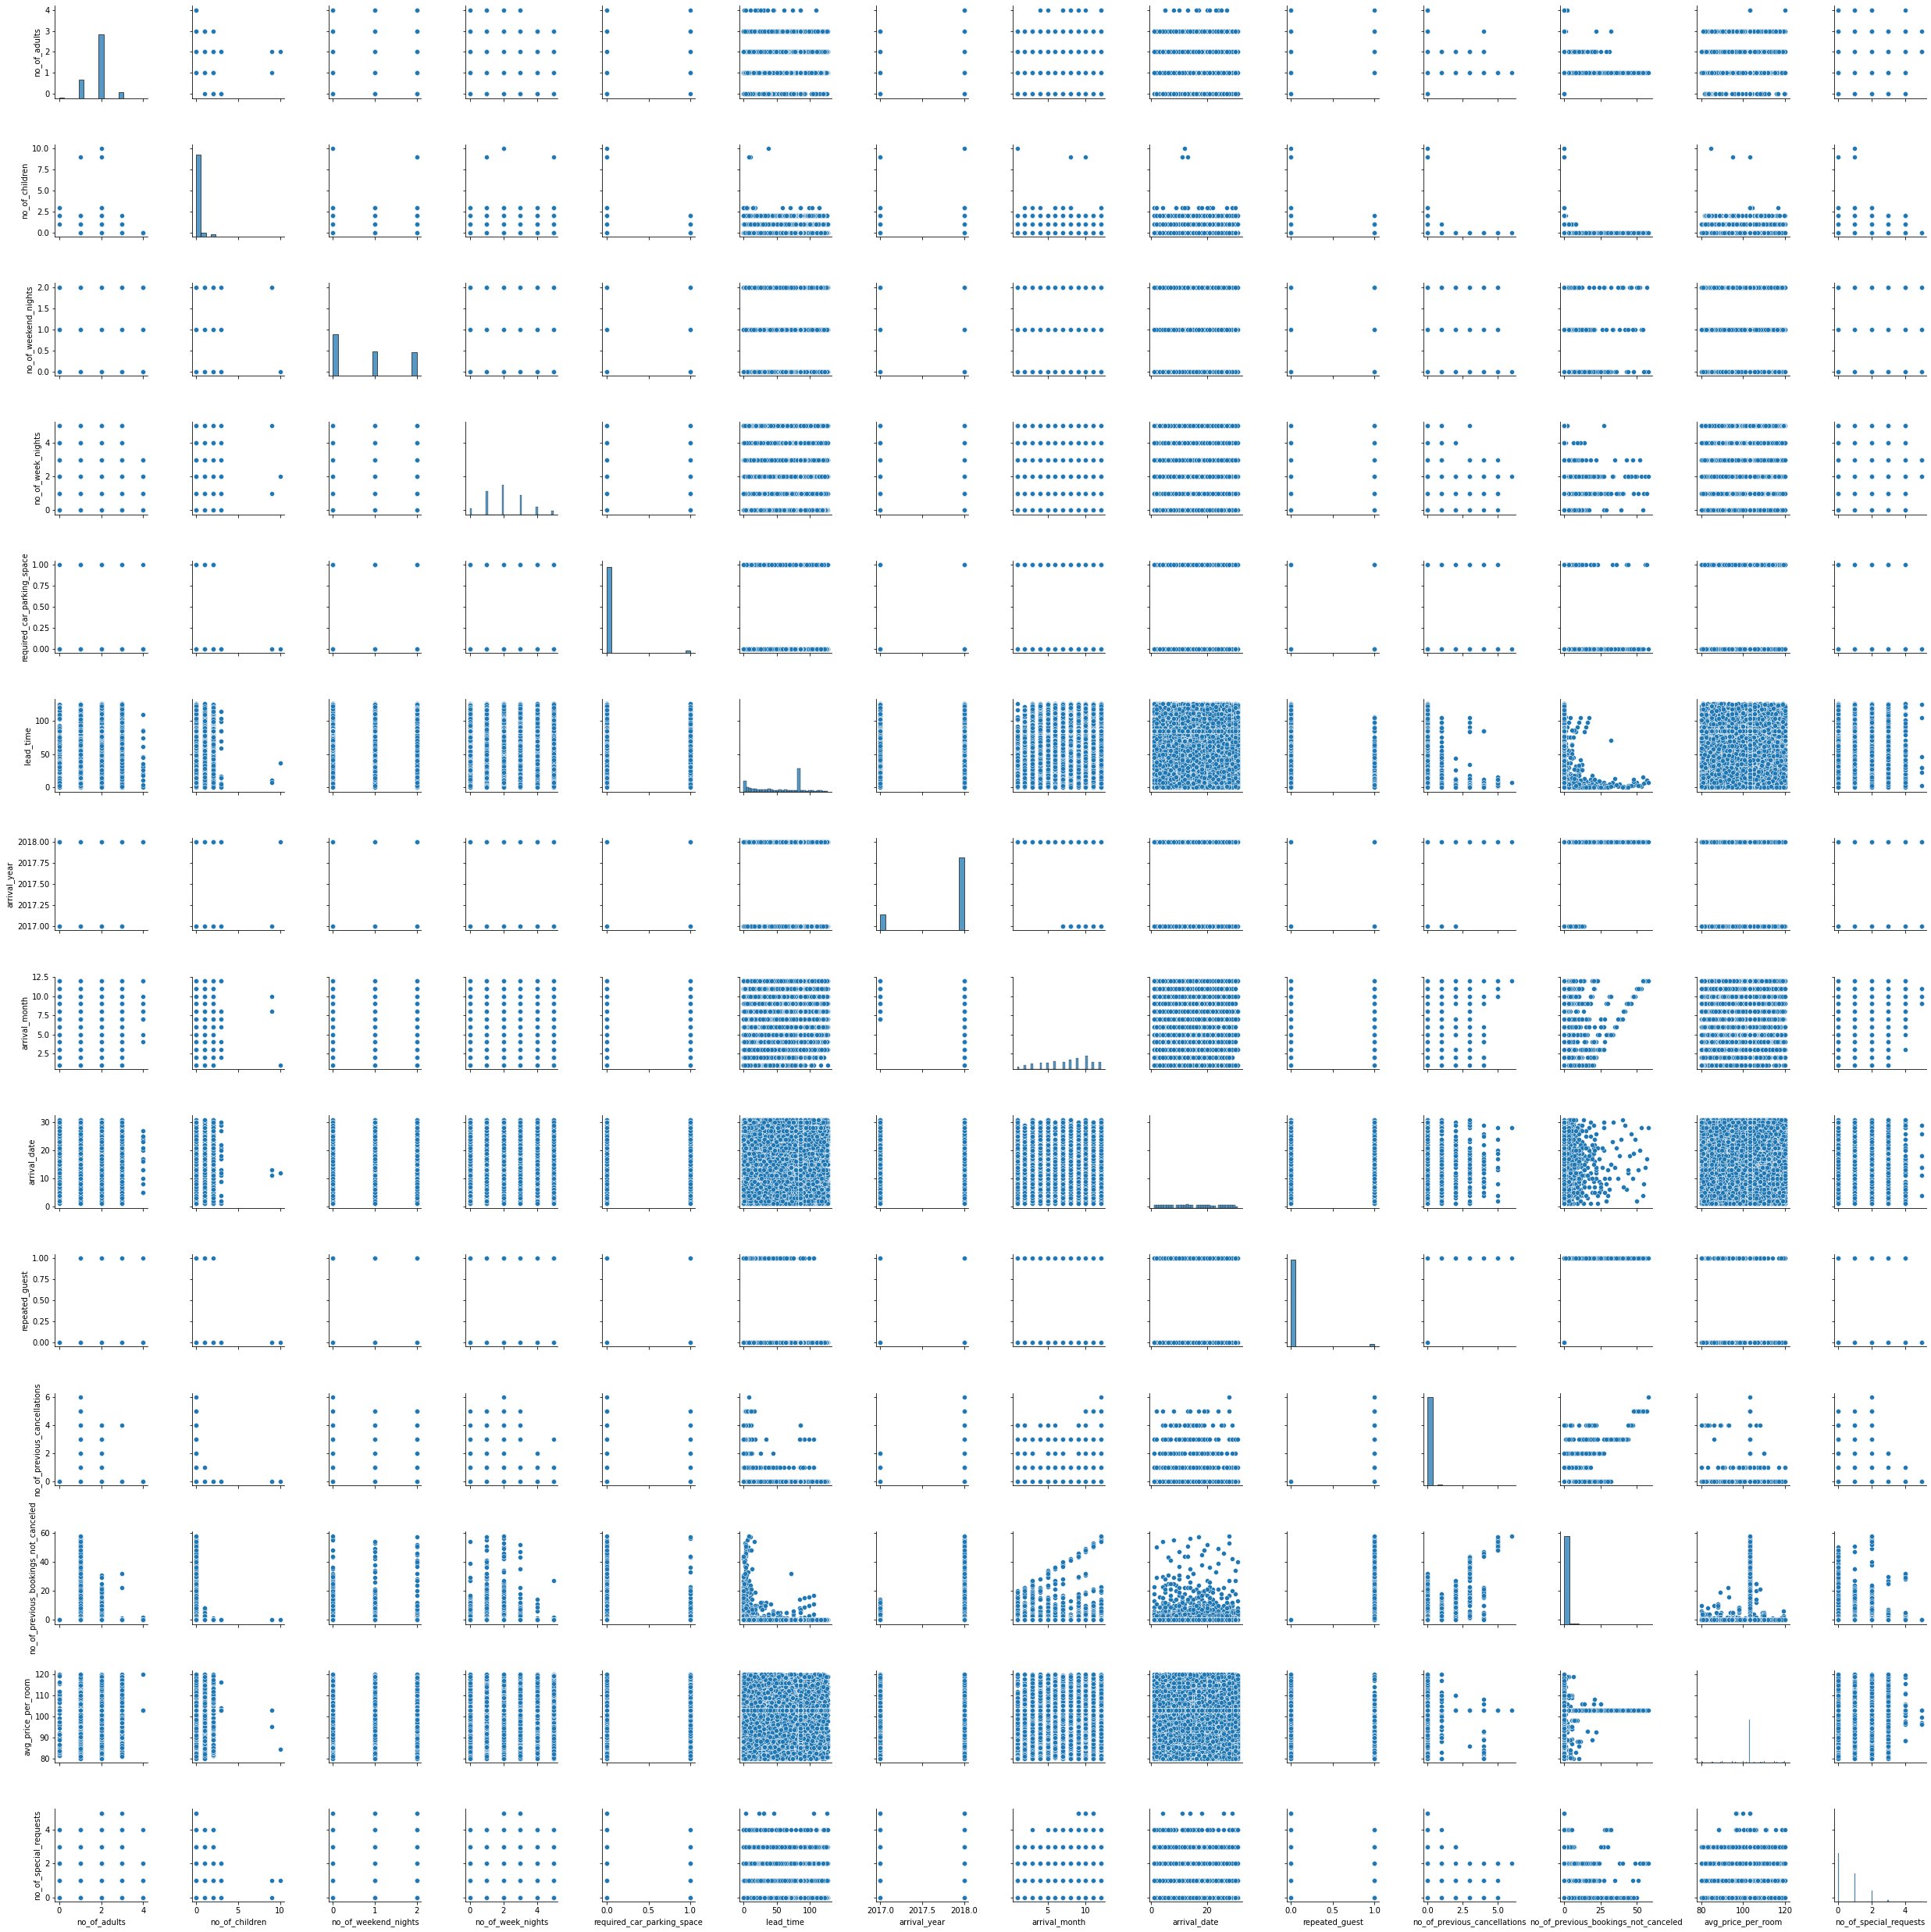

In [103]:
sns.pairplot(Reservations)

In [104]:
# Understanding the relationship between the numerical variables.
Reservations.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.114591,0.134718,0.011429,0.164795,0.076719,0.021841,0.026338,-0.192277,-0.080299,-0.119166,0.060925,0.189401
no_of_children,-0.019787,1.000000,0.027754,0.018772,0.034244,-0.021766,0.045983,-0.003076,0.025482,-0.036348,-0.020904,-0.021189,0.049546,0.124486
no_of_weekend_nights,0.114591,0.027754,1.000000,0.006753,-0.030767,0.115003,0.054669,-0.008229,0.030600,-0.068348,-0.023970,-0.026923,-0.030792,0.064152
no_of_week_nights,0.134718,0.018772,0.006753,1.000000,-0.048159,0.231459,0.032313,0.046161,-0.002928,-0.108368,-0.041360,-0.057415,-0.018825,0.051024
required_car_parking_space,0.011429,0.034244,-0.030767,-0.048159,1.000000,-0.074803,0.015684,-0.015505,-0.000037,0.110909,0.035565,0.063810,0.023428,0.087922
lead_time,0.164795,-0.021766,0.115003,0.231459,-0.074803,1.000000,0.130748,0.059297,0.000309,-0.192694,-0.090022,-0.109314,0.008685,-0.057480
arrival_year,0.076719,0.045983,0.054669,0.032313,0.015684,0.130748,1.000000,-0.339689,0.018849,-0.018175,-0.005915,0.026422,0.023971,0.053205
arrival_month,0.021841,-0.003076,-0.008229,0.046161,-0.015505,0.059297,-0.339689,1.000000,-0.042780,0.000341,-0.015150,-0.010718,0.069246,0.110552
arrival_date,0.026338,0.025482,0.030600,-0.002928,-0.000037,0.000309,0.018849,-0.042780,1.000000,-0.015949,-0.012814,-0.001498,-0.007894,0.018352
repeated_guest,-0.192277,-0.036348,-0.068348,-0.108368,0.110909,-0.192694,-0.018175,0.000341,-0.015949,1.000000,0.500342,0.539156,0.002329,-0.011820


There is no clear relationship between the variables. None have correlation close to or equal to 1. 

**MODELLING**

In [124]:
# Encoding the categorical variables
encoded= pd.get_dummies(Reservations, columns = ["type_of_meal_plan","room_type_reserved","market_segment_type"])
X = encoded.drop("booking_status",axis=1)
y = encoded['booking_status']
encoded.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,85,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,85,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


In [125]:
# creating a logistic regression model
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

LogisticRegression()

In [137]:
y_predicted = LogReg.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Checking the accuracy of the logistic model 

confusion_matrix = confusion_matrix(y_test,y_predicted)
print(confusion_matrix)
print(classification_report(y_test, y_predicted))

[[1216 1185]
 [ 664 4190]]
              precision    recall  f1-score   support

    Canceled       0.65      0.51      0.57      2401
Not_Canceled       0.78      0.86      0.82      4854

    accuracy                           0.75      7255
   macro avg       0.71      0.68      0.69      7255
weighted avg       0.74      0.75      0.74      7255



A huge number of our variables have not been accurately classified as we can see from the above confusion matrix. Therefore the logistic model is not a good fit for this data. 

In [128]:
# Modelling using a decision tree
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(max_depth = 3)
Tree = DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.7404548587181254


Our decision tree model has an accuracy of 74%, which indicates that the model is a relatively good fit for the data. 

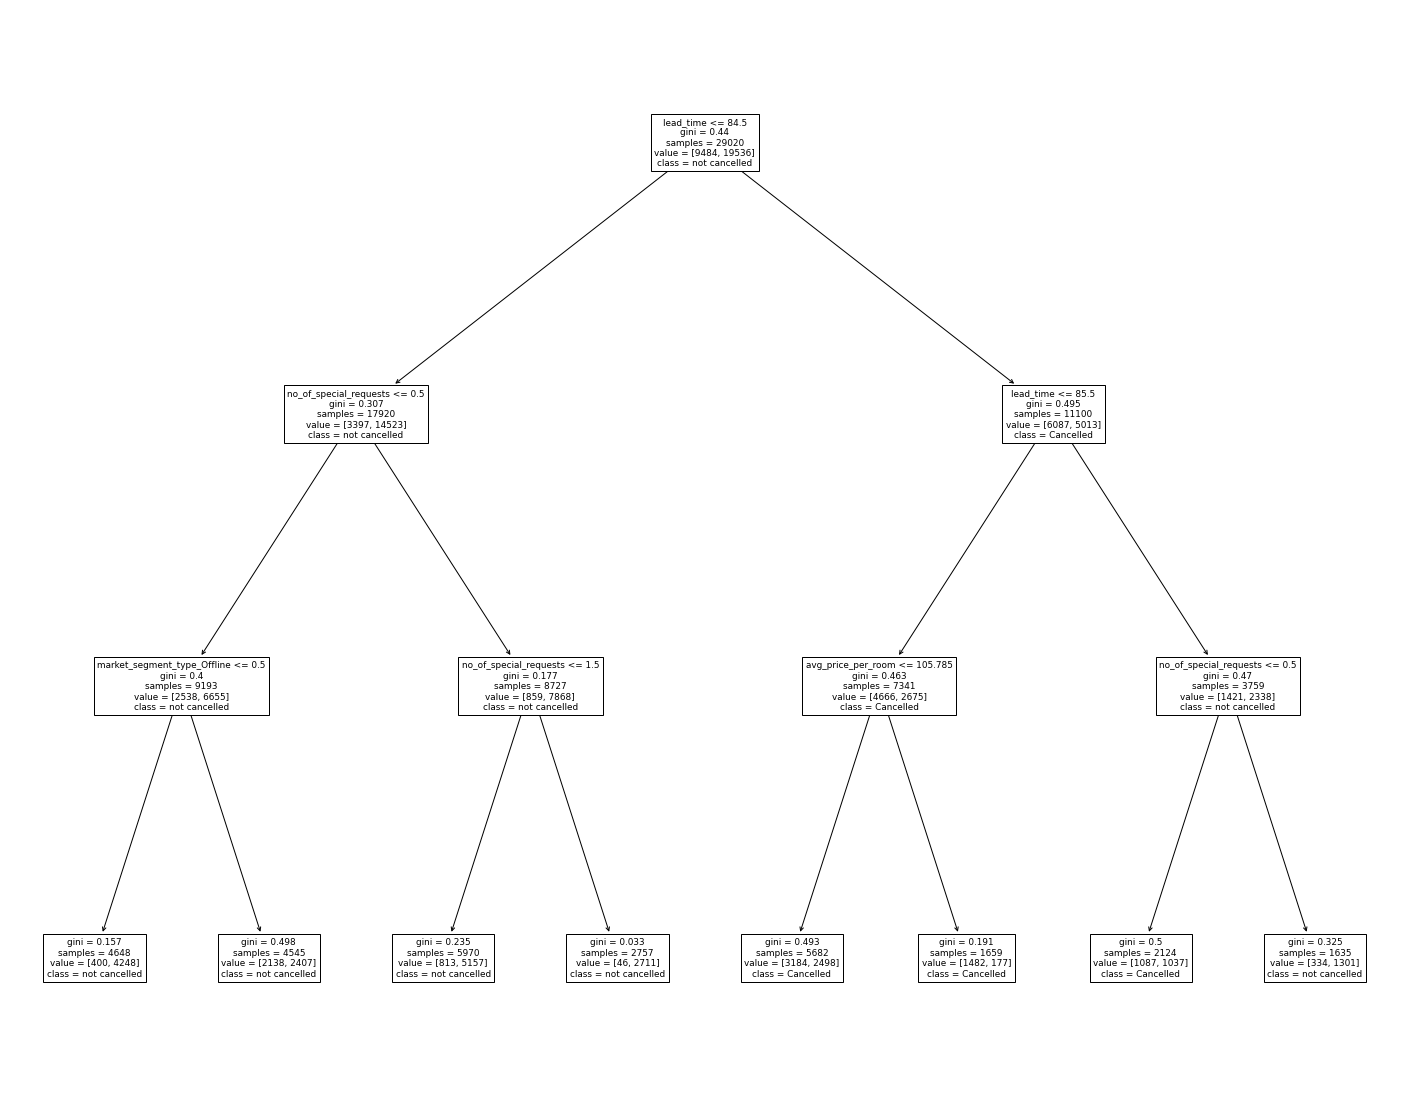

In [136]:
# Visualization of the decision tree

feature_names = list(encoded.columns[:-1])
from sklearn.tree import plot_tree
plt.figure(figsize=(25,20))
plot_tree(Tree,class_names = ['Cancelled','not cancelled'],feature_names = feature_names)
plt.show()

**Conclusion**

The main factors that contribute to a reservation being cancelled or not are Lead Time, number of special requests, market segment and average price per room. 
Lead time is however the major factor determining the status of a booking. 
If the number of days between the date of booking and the arrival date is less than or equal to 84 then the booking is not likely to be cancelled.





**Recommendations**

It is crucial to continuously engage potential clients to ensure that the lead time is maintained below 84 days. This can be done in terms of promotional packages which can entice the clients to book and go on their trips within a short period of time. 